In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
!gdown --id 1Dvw0UpvItjig0JbnzbTgYKB-ibMrXdxk
!unzip -q dogs-vs-cats.zip
!unzip -q train.zip
!unzip -q test1.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1Dvw0UpvItjig0JbnzbTgYKB-ibMrXdxk
From (redirected): https://drive.google.com/uc?id=1Dvw0UpvItjig0JbnzbTgYKB-ibMrXdxk&confirm=t&uuid=8c10fd68-c2dd-4973-af95-5b97a91215dd
To: /content/dogs-vs-cats.zip
100% 852M/852M [00:06<00:00, 140MB/s]


In [3]:
IMAGE_WIDTH = 60
IMAGE_HEIGHT = 60
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3

In [6]:
filenames = os.listdir("./train")
categories = []

for filename in filenames:
  category = filename.split('.')[0]
  if category == "dog":
    categories.append(1)
  elif category == "cat":
    categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'class': categories
})

df.head()

,filename,class
0,dog.9163.jpg,1
1,dog.2577.jpg,1
2,dog.6093.jpg,1
3,cat.10860.jpg,0
4,dog.3769.jpg,1


<Axes: xlabel='class'>

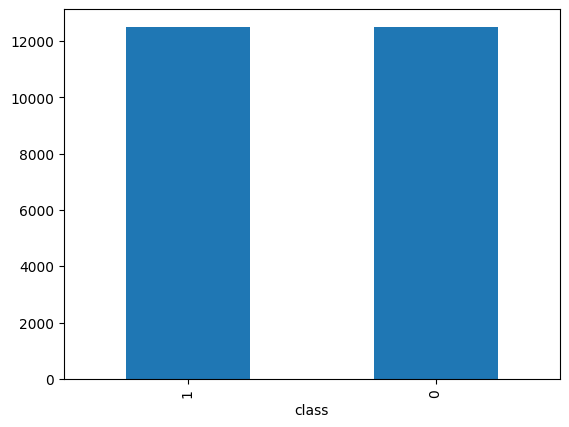

In [7]:
df['class'].value_counts().plot.bar()

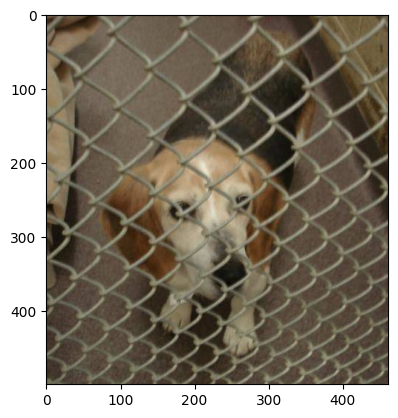

In [9]:
sample = random.choice(filenames)
image = load_img("./train/" + sample)
plt.imshow(image)

In [10]:
from keras.models import Sequential
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation

In [12]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 58, 58, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 29, 29, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 27, 27, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)         

In [13]:
df['class'] = df['class'].replace({0: 'cat', 1: 'dog'})
df.head()

,filename,class
0,dog.9163.jpg,dog
1,dog.2577.jpg,dog
2,dog.6093.jpg,dog
3,cat.10860.jpg,cat
4,dog.3769.jpg,dog
